In [172]:
import copy
import pandas as pd
import numpy as np
import scipy.stats as stats

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import re

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

In [373]:
recipe_url = 'https://www.epicurious.com/search?page=862&sort=mostReviewed'
r = requests.get(recipe_url)

In [374]:
r.status_code

200

In [1]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

# Access/Initiate Database
recipe_db = client.recipe_database

# Access/Initiate Table
recipes_table = recipe_db.recipes_table

In [368]:
recipes = recipes_table.find()
recipe_table = pd.DataFrame(list(recipes))
recipe_table.shape

(32832, 83)

In [367]:
#extract all recipes with 'Winter' tag
def find_winter(x):
    col='Tag #'
    for _ in range(1,39):
        if x[col+str(_)]=='Winter': return True
    return False
         
mask = recipe_table.apply(find_winter,axis=1)
#print(mask)

Winter = recipe_table[mask]

winter_nutrition = Winter[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]


In [369]:
#extract all recipes with 'Winter' tag
def find_summer(x):
    col='Tag #'
    for _ in range(1,39):
        if x[col+str(_)]=='Summer': return True
    return False
         
mask = recipe_table.apply(find_summer,axis=1)
#print(mask)

Summer = recipe_table[mask]


summer_nutrition = Summer[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]


In [362]:
#data cleaning
def get_val(x):
    return str(x).split(' ')[0]
# def get_perc(x):
#     return str(x.split(' ')[1])[2:-2]

colz = ['Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Protein',
       'Saturated Fat', 'Sodium']
valcolz = [x[:3] + '_val' for x in colz]
percolz = [x[:3] + '_perc' for x in colz]

for i,x in enumerate(colz):
    winter_nutrition[valcolz[i]] = winter_nutrition[x].dropna().apply(get_val)
#     rn[percolz[i]] = rn[x].dropna().apply(get_perc)
    
for i,x in enumerate(colz):
    summer_nutrition[valcolz[i]] = summer_nutrition[x].dropna().apply(get_val)
#     rna[percolz[i]] = rna[x].dropna().apply(get_perc)

summer_nutrition['Make_Again#'] = summer_nutrition['Make_Again'].apply(lambda x: x.strip('%'))
winter_nutrition['Make_Again#'] = winter_nutrition['Make_Again'].apply(lambda x: x.strip('%'))


/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [104]:
# summer_nutrition

In [365]:
summer_nutritions = summer_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)
winter_nutritions = winter_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)

summer_nutritions['score'] = summer_nutritions['Rating'] * summer_nutritions['Reviews'] * summer_nutritions['Make_Again#']/100

winter_nutritions['score'] = winter_nutritions['Rating'] * winter_nutritions['Reviews'] * winter_nutritions['Make_Again#']/100

winter_nutritions


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
5,286.0,96,4.0,484,55.0,35.0,7.0,2.0,4.0,4.0,240.0,1858.560
6,3400.0,91,3.5,481,485.0,616.0,157.0,20.0,44.0,86.0,2373.0,1531.985
8,283.0,90,3.5,446,33.0,35.0,13.0,2.0,11.0,8.0,535.0,1404.900
9,791.0,95,4.0,443,13.0,221.0,57.0,2.0,51.0,23.0,697.0,1683.400
12,851.0,95,3.5,424,45.0,178.0,55.0,5.0,46.0,27.0,1384.0,1409.800
16,463.0,91,3.5,409,31.0,60.0,26.0,9.0,28.0,5.0,303.0,1302.665
19,513.0,96,3.5,400,67.0,49.0,20.0,7.0,20.0,11.0,617.0,1344.000
26,656.0,89,3.5,386,37.0,196.0,38.0,3.0,40.0,15.0,684.0,1202.390
38,341.0,91,3.5,331,26.0,86.0,11.0,7.0,37.0,3.0,626.0,1054.235
40,563.0,93,3.5,327,56.0,73.0,27.0,6.0,26.0,13.0,595.0,1064.385


In [283]:
winter_nutritions.describe()


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
count,3408.000000,4192.000000,4192.000000,4192.000000,3406.000000,2990.000000,3405.000000,3374.000000,3406.000000,3404.000000,3407.000000,4192.000000
mean,529.424589,84.903149,3.292581,31.761450,42.570170,117.099666,30.297504,4.272081,21.389019,11.548472,523.689756,96.306000
std,719.131770,13.465410,0.426373,42.295823,73.879989,170.370107,53.408206,5.745626,32.256696,21.918055,881.238362,138.988635
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,80.000000,3.000000,9.000000,15.000000,29.000000,10.000000,1.000000,4.000000,3.000000,110.000000,23.400000
50%,381.000000,88.000000,3.500000,17.000000,30.000000,76.000000,19.000000,3.000000,10.000000,7.000000,320.000000,48.755000
75%,629.000000,94.000000,3.500000,36.000000,51.000000,155.000000,35.000000,5.000000,30.000000,14.000000,683.000000,109.440000
max,16486.000000,100.000000,4.000000,484.000000,1582.000000,3192.000000,1528.000000,145.000000,612.000000,663.000000,30739.000000,1858.560000


In [140]:
winter_nutritions.reset_index().head()

,index,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
0,5,286.0,96,4.0,484,55.0,35.0,7.0,2.0,4.0,4.0,240.0,1858.560
1,6,3400.0,91,3.5,481,485.0,616.0,157.0,20.0,44.0,86.0,2373.0,1531.985
2,8,283.0,90,3.5,446,33.0,35.0,13.0,2.0,11.0,8.0,535.0,1404.900
3,9,791.0,95,4.0,443,13.0,221.0,57.0,2.0,51.0,23.0,697.0,1683.400
4,12,851.0,95,3.5,424,45.0,178.0,55.0,5.0,46.0,27.0,1384.0,1409.800


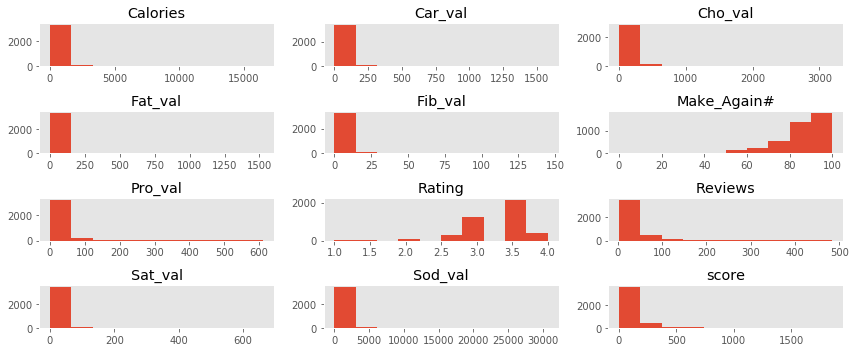

In [292]:
winter_nutritions.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

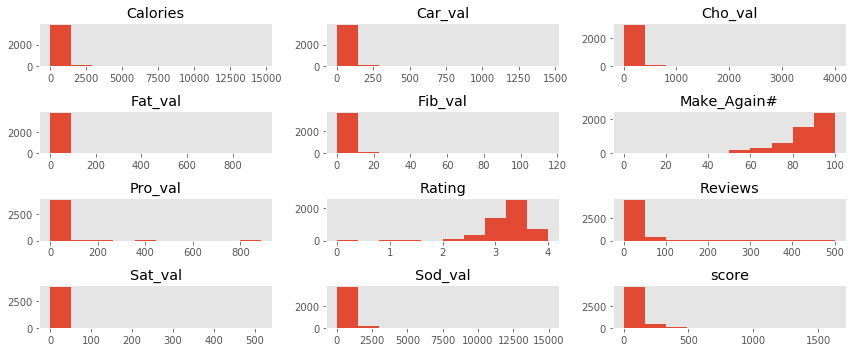

In [293]:
summer_nutritions.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

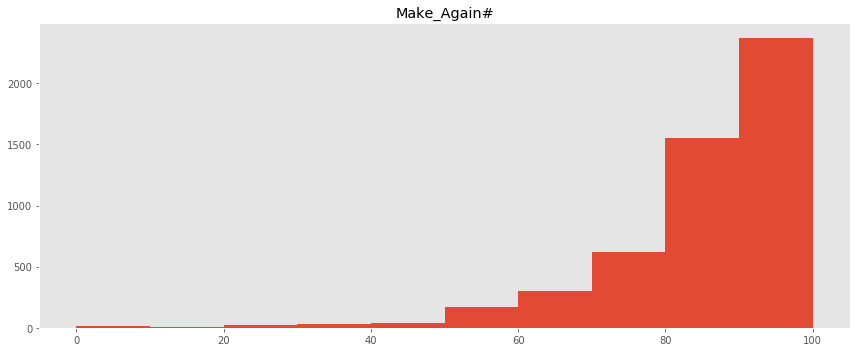

In [372]:
summer_nutritions.hist('Make_Again#',figsize=(12, 5), grid=False)
plt.tight_layout()

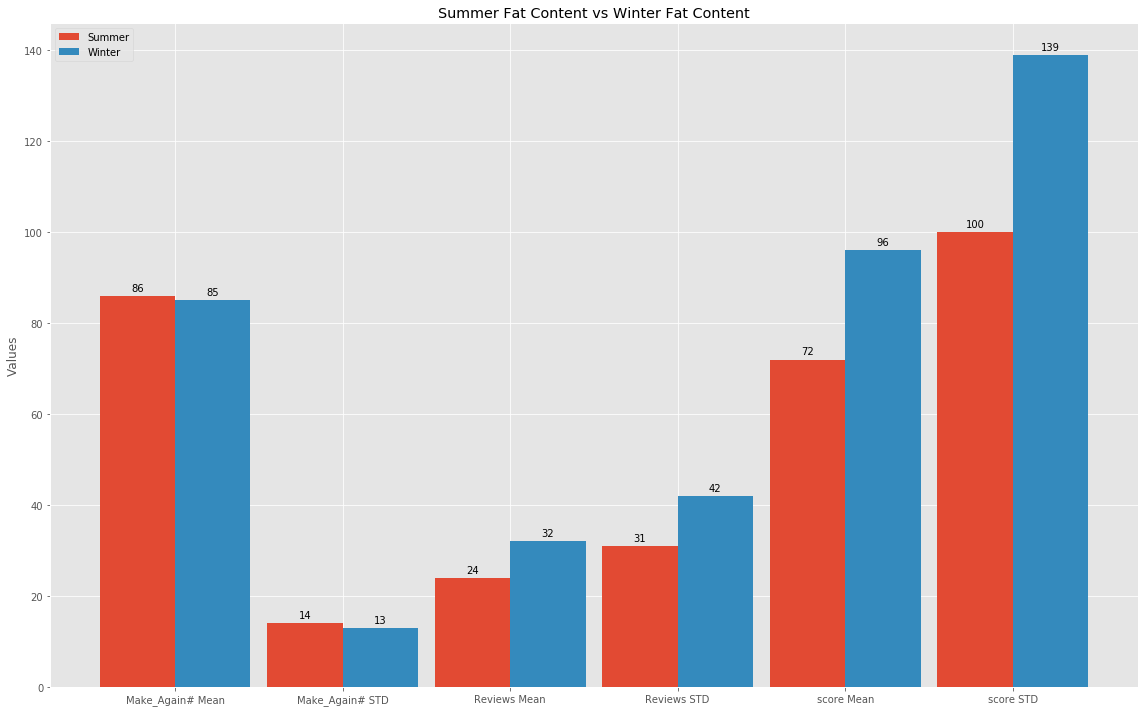

In [318]:
nutrition_list = ['Make_Again#', 'Reviews', 'score']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(summer_nutritions[i].mean()))
        summer_means.append(round(summer_nutritions[i].std()))
        winter_means.append(round(winter_nutritions[i].mean()))
        winter_means.append(round(winter_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(16,10))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Summer')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Winter')

    ax.set_ylabel('Values')
    ax.set_title('Summer Fat Content vs Winter Fat Content')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

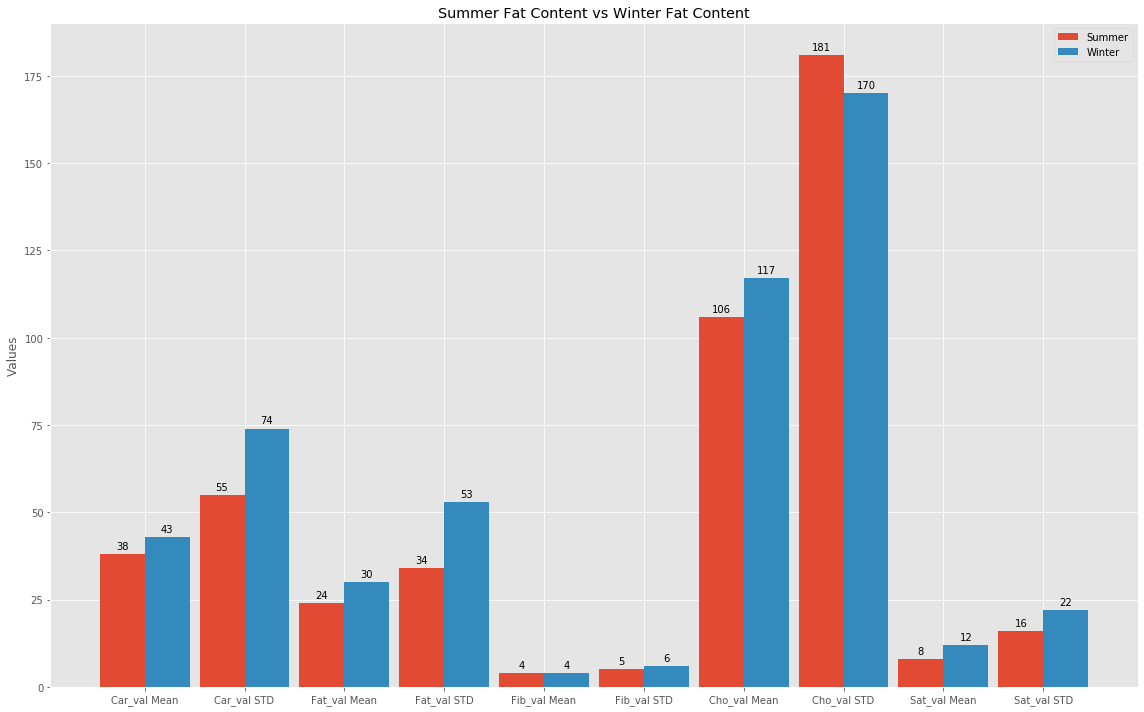

In [321]:
nutrition_list = ['Car_val', 'Fat_val', 'Fib_val', 'Cho_val', 'Sat_val']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(summer_nutritions[i].mean()))
        summer_means.append(round(summer_nutritions[i].std()))
        winter_means.append(round(winter_nutritions[i].mean()))
        winter_means.append(round(winter_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(16,10))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Summer')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Winter')

    ax.set_ylabel('Values')
    ax.set_title('Summer Fat Content vs Winter Fat Content')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

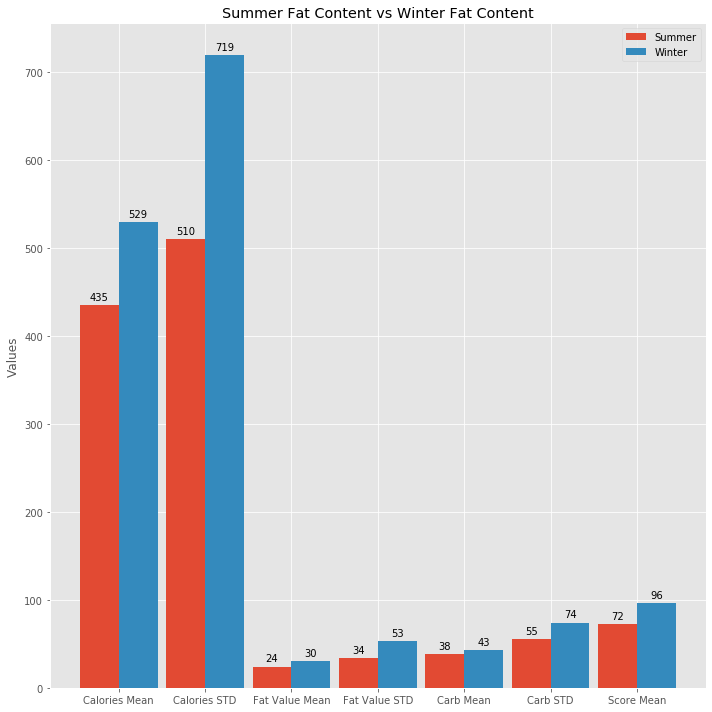

In [303]:


labels = ['Calories Mean', 'Calories STD', 'Fat Value Mean', 'Fat Value STD', 'Carb Mean', 'Carb STD', 'Score Mean']
summer_means = [round(summer_nutritions['Calories'].mean()),
                round(summer_nutritions['Calories'].std()),
                round(summer_nutritions['Fat_val'].mean()),
                round(summer_nutritions['Fat_val'].std()),
                round(summer_nutritions['Car_val'].mean()),
                round(summer_nutritions['Car_val'].std()),
                round(summer_nutritions['score'].mean())]
winter_means = [round(winter_nutritions['Calories'].mean()),
                round(winter_nutritions['Calories'].std()),
                round(winter_nutritions['Fat_val'].mean()),
                round(winter_nutritions['Fat_val'].std()),
                round(winter_nutritions['Car_val'].mean()),
                round(winter_nutritions['Car_val'].std()),
                round(winter_nutritions['score'].mean())]

x = np.arange(len(labels))
width = .45

fig,ax=plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, summer_means, width, label='Summer')
rects2 = ax.bar(x + width/2, winter_means, width, label='Winter')

ax.set_ylabel('Values')
ax.set_title('Summer Fat Content vs Winter Fat Content')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0,3),
                   textcoords = 'offset points',
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()



1. Determine Hypothesis
Null Hypothesis: Winter and Summer Fat Content are the same
Alternate Hypothesis: Fat Content are different
    
2. Collect Data
Data: winter nutritions & summer nutritions
    
3. Determine confidence interval and degrees of freedom
alpha = .05
95% confidence that conclusion will be valid
degree of freedom can be calculated with: degree_freedom = nx + ny - 2
    
4. Calculate t-statistic


5. Calculate critical t-value from the t distribution


6. Compare the critical t-values with the calculated t statistic



In [205]:
# distribution?


In [319]:
winter_sample = []
for i,v in enumerate(winter_nutritions['Fat_val']):
    if v % 1 != 0:
        continue
    else:
        winter_sample.append(v)

        
summer_sample = []
for i,v in enumerate(summer_nutritions['Fat_val']):
    if v % 1 != 0:
        continue
    else:
        summer_sample.append(v)

        
# summer_sample

In [200]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [202]:
test_statistic = welch_test_statistic(summer_sample, winter_sample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))


Welch Test Statistic: -5.23


ValueError: operands could not be broadcast together with shapes (3405,) (3873,) 

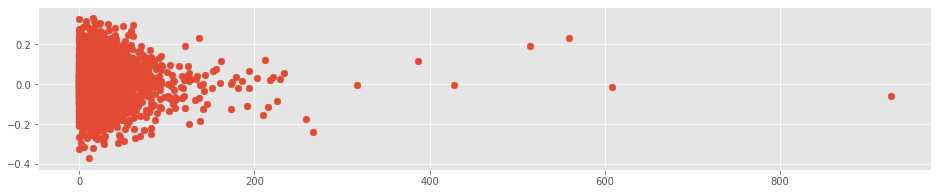

In [377]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(summer_sample, np.repeat(0, len(summer_sample)) + np.random.normal(0, 0.1, len(summer_sample)), s=45)
ax.scatter(winter_sample, np.repeat(1, len(winter_sample)) + np.random.normal(0, 0.1, len(summer_sample)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Winter", "Summer"])


In [253]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [254]:
winter_wins = count_winning_pairs(winter_sample, summer_sample)
summer_wins = count_winning_pairs(summer_sample, winter_sample)
print("Number of Winter Wins: {}".format(winter_wins))
print("Number of Summer Wins: {}".format(summer_wins))

Number of Winter Wins: 61.5
Number of Summer Wins: 563.5


In [255]:
print("Total Number of Wins: {}".format(winter_wins + summer_wins))
print("Total Number of Comparisons: {}".format(len(winter_sample)*len(summer_sample)))

Total Number of Wins: 625.0
Total Number of Comparisons: 625


H0 = fat content is equal in summer and winter
H1 = fat content is not equal

In [383]:
res = stats.mannwhitneyu(winter_sample, summer_sample, alternative="greater")
print("p-value for Winter > Summer: {:2.30f}".format(res.pvalue))

p-value for Winter > Summer: 0.000000000549583494132990057820


In [329]:
type(recipe_table)

pandas.core.frame.DataFrame

In [336]:
gourmet = recipe_table[(recipe_table['Tag #1']=='Gourmet')|
                      (recipe_table['Tag #2']=='Gourmet')|
                      (recipe_table['Tag #3']=='Gourmet')|
                      (recipe_table['Tag #4']=='Gourmet')|
                      (recipe_table['Tag #5']=='Gourmet')|
                      (recipe_table['Tag #6']=='Gourmet')|
                      (recipe_table['Tag #7']=='Gourmet')|
                      (recipe_table['Tag #8']=='Gourmet')|
                      (recipe_table['Tag #9']=='Gourmet')|
                      (recipe_table['Tag #10']=='Gourmet')|
                      (recipe_table['Tag #11']=='Gourmet')|
                      (recipe_table['Tag #12']=='Gourmet')|
                      (recipe_table['Tag #13']=='Gourmet')|
                      (recipe_table['Tag #14']=='Gourmet')|
                      (recipe_table['Tag #15']=='Gourmet')|
                      (recipe_table['Tag #16']=='Gourmet')|
                      (recipe_table['Tag #17']=='Gourmet')|
                      (recipe_table['Tag #18']=='Gourmet')|
                      (recipe_table['Tag #19']=='Gourmet')|
                      (recipe_table['Tag #20']=='Gourmet')|
                      (recipe_table['Tag #21']=='Gourmet')|
                      (recipe_table['Tag #22']=='Gourmet')|
                      (recipe_table['Tag #23']=='Gourmet')|
                      (recipe_table['Tag #24']=='Gourmet')]

gourmet_nutrition = gourmet[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]

gourmet_nutrition

,Calories,Carbohydrates,Cholesterol,Fat,Fiber,Make_Again,Monounsaturated Fat,Polyunsaturated Fat,Protein,Rating,Reviews,Saturated Fat,Sodium,Title,_id
0,NaN,NaN,NaN,NaN,NaN,92%,NaN,NaN,NaN,3.5,508,NaN,NaN,Turkey Meatloaf recipe,5d7704f56195baeafe9d48c4
1,262,1 g(0%),145 mg(48%),16 g(25%),0 g(0%),93%,6 g,2 g,28 g(56%),3.5,501,6 g(30%),405 mg(17%),Pan-Seared Tilapia with Chile Lime Butter recipe,5d7704f56195baeafe9d48c5
14,603,30 g(10%),156 mg(52%),39 g(60%),2 g(9%),92%,14 g,2 g,28 g(55%),4,417,20 g(99%),451 mg(19%),Chicken Marsala recipe,5d7704f56195baeafe9d48d2
18,NaN,NaN,NaN,NaN,NaN,93%,NaN,NaN,NaN,3.5,407,NaN,NaN,Parmesan Chicken recipe,5d77050e6195baeafe9d48d6
20,2153,224 g(75%),802 mg(267%),140 g(216%),7 g(27%),92%,41 g,7 g,25 g(49%),3.5,393,83 g(416%),239 mg(10%),Flourless Chocolate Cake recipe,5d77050e6195baeafe9d48d8
22,386,38 g(13%),159 mg(53%),24 g(37%),0 g(1%),94%,7 g,2 g,6 g(13%),3.5,392,14 g(68%),136 mg(6%),Key Lime Pie recipe,5d77050e6195baeafe9d48da
25,265,39 g(13%),37 mg(12%),12 g(19%),1 g(5%),85%,4 g,1 g,3 g(6%),3.5,388,7 g(36%),145 mg(6%),Chocolate Chip Cookies recipe,5d77050e6195baeafe9d48dd
31,521,28 g(9%),185 mg(62%),28 g(43%),3 g(11%),92%,12 g,3 g,39 g(78%),3.5,366,11 g(56%),472 mg(20%),Meatloaf recipe,5d77050e6195baeafe9d48e3
34,429,32 g(11%),122 mg(41%),32 g(49%),1 g(3%),95%,9 g,2 g,6 g(11%),3.5,353,16 g(82%),316 mg(13%),Pumpkin Cheesecake with Bourbon–Sour Cream Top...,5d77050e6195baeafe9d48e6
35,780,87 g(29%),110 mg(37%),48 g(74%),6 g(23%),91%,14 g,4 g,9 g(18%),4,351,28 g(138%),360 mg(15%),Inside-Out German Chocolate Cake recipe,5d77050e6195baeafe9d48e7


In [335]:
easy  = recipe_table[(recipe_table['Tag #1']=='Quick & Easy')|
                      (recipe_table['Tag #2']=='Quick & Easy')|
                      (recipe_table['Tag #3']=='Quick & Easy')|
                      (recipe_table['Tag #4']=='Quick & Easy')|
                      (recipe_table['Tag #5']=='Quick & Easy')|
                      (recipe_table['Tag #6']=='Quick & Easy')|
                      (recipe_table['Tag #7']=='Quick & Easy')|
                      (recipe_table['Tag #8']=='Quick & Easy')|
                      (recipe_table['Tag #9']=='Quick & Easy')|
                      (recipe_table['Tag #10']=='Quick & Easy')|
                      (recipe_table['Tag #11']=='Quick & Easy')|
                      (recipe_table['Tag #12']=='Quick & Easy')|
                      (recipe_table['Tag #13']=='Quick & Easy')|
                      (recipe_table['Tag #14']=='Quick & Easy')|
                      (recipe_table['Tag #15']=='Quick & Easy')|
                      (recipe_table['Tag #16']=='Quick & Easy')|
                      (recipe_table['Tag #17']=='Quick & Easy')|
                      (recipe_table['Tag #18']=='Quick & Easy')|
                      (recipe_table['Tag #19']=='Quick & Easy')|
                      (recipe_table['Tag #20']=='Quick & Easy')|
                      (recipe_table['Tag #21']=='Quick & Easy')|
                      (recipe_table['Tag #22']=='Quick & Easy')|
                      (recipe_table['Tag #23']=='Quick & Easy')|
                      (recipe_table['Tag #24']=='Quick & Easy')]

easy_nutrition = easy[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]

easy_nutrition

,Calories,Carbohydrates,Cholesterol,Fat,Fiber,Make_Again,Monounsaturated Fat,Polyunsaturated Fat,Protein,Rating,Reviews,Saturated Fat,Sodium,Title,_id
1,262,1 g(0%),145 mg(48%),16 g(25%),0 g(0%),93%,6 g,2 g,28 g(56%),3.5,501,6 g(30%),405 mg(17%),Pan-Seared Tilapia with Chile Lime Butter recipe,5d7704f56195baeafe9d48c5
4,675,67 g(22%),181 mg(60%),30 g(47%),3 g(13%),95%,14 g,3 g,27 g(54%),3.5,497,12 g(58%),655 mg(27%),Shrimp Scampi Pasta recipe,5d7704f56195baeafe9d48c8
14,603,30 g(10%),156 mg(52%),39 g(60%),2 g(9%),92%,14 g,2 g,28 g(55%),4,417,20 g(99%),451 mg(19%),Chicken Marsala recipe,5d7704f56195baeafe9d48d2
16,463,31 g(10%),60 mg(20%),26 g(40%),9 g(34%),91%,14 g,4 g,28 g(56%),3.5,409,5 g(26%),303 mg(13%),"Roast Chicken Breasts with Garbanzo Beans, Tom...",5d7704f56195baeafe9d48d4
18,NaN,NaN,NaN,NaN,NaN,93%,NaN,NaN,NaN,3.5,407,NaN,NaN,Parmesan Chicken recipe,5d77050e6195baeafe9d48d6
20,2153,224 g(75%),802 mg(267%),140 g(216%),7 g(27%),92%,41 g,7 g,25 g(49%),3.5,393,83 g(416%),239 mg(10%),Flourless Chocolate Cake recipe,5d77050e6195baeafe9d48d8
30,380,22 g(7%),4 mg(1%),33 g(50%),3 g(11%),94%,16 g,12 g,2 g(4%),3.5,368,3 g(15%),65 mg(3%),"Apple, Dried Cherry, and Walnut Salad with Map...",5d77050e6195baeafe9d48e2
39,NaN,NaN,NaN,NaN,NaN,97%,NaN,NaN,NaN,3.5,330,NaN,NaN,Black Bean and Tomato Quinoa recipe,5d7705236195baeafe9d48eb
43,310,25 g(8%),47 mg(16%),18 g(28%),5 g(22%),94%,6 g,1 g,14 g(29%),3.5,318,10 g(49%),492 mg(21%),Cream of Asparagus Soup (Crème d'asperges) recipe,5d7705236195baeafe9d48ef
55,472,21 g(7%),94 mg(31%),23 g(35%),0 g(1%),90%,6 g,7 g,36 g(73%),3.5,294,5 g(26%),982 mg(41%),Salmon with Soy-Honey and Wasabi Sauces recipe,5d7705386195baeafe9d48fb


In [337]:
for i,x in enumerate(colz):
    gourmet_nutrition[valcolz[i]] = gourmet_nutrition[x].dropna().apply(get_val)
#     rn[percolz[i]] = rn[x].dropna().apply(get_perc)
    
for i,x in enumerate(colz):
    easy_nutrition[valcolz[i]] = easy_nutrition[x].dropna().apply(get_val)
#     rna[percolz[i]] = rna[x].dropna().apply(get_perc)

gourmet_nutrition['Make_Again#'] = gourmet_nutrition['Make_Again'].apply(lambda x: x.strip('%'))
easy_nutrition['Make_Again#'] = easy_nutrition['Make_Again'].apply(lambda x: x.strip('%'))

/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [338]:
gourmet_nutrition

,Calories,Carbohydrates,Cholesterol,Fat,Fiber,Make_Again,Monounsaturated Fat,Polyunsaturated Fat,Protein,Rating,...,Title,_id,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,Make_Again#
0,NaN,NaN,NaN,NaN,NaN,92%,NaN,NaN,NaN,3.5,...,Turkey Meatloaf recipe,5d7704f56195baeafe9d48c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92
1,262,1 g(0%),145 mg(48%),16 g(25%),0 g(0%),93%,6 g,2 g,28 g(56%),3.5,...,Pan-Seared Tilapia with Chile Lime Butter recipe,5d7704f56195baeafe9d48c5,1,145,16,0,28,6,405,93
14,603,30 g(10%),156 mg(52%),39 g(60%),2 g(9%),92%,14 g,2 g,28 g(55%),4,...,Chicken Marsala recipe,5d7704f56195baeafe9d48d2,30,156,39,2,28,20,451,92
18,NaN,NaN,NaN,NaN,NaN,93%,NaN,NaN,NaN,3.5,...,Parmesan Chicken recipe,5d77050e6195baeafe9d48d6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
20,2153,224 g(75%),802 mg(267%),140 g(216%),7 g(27%),92%,41 g,7 g,25 g(49%),3.5,...,Flourless Chocolate Cake recipe,5d77050e6195baeafe9d48d8,224,802,140,7,25,83,239,92
22,386,38 g(13%),159 mg(53%),24 g(37%),0 g(1%),94%,7 g,2 g,6 g(13%),3.5,...,Key Lime Pie recipe,5d77050e6195baeafe9d48da,38,159,24,0,6,14,136,94
25,265,39 g(13%),37 mg(12%),12 g(19%),1 g(5%),85%,4 g,1 g,3 g(6%),3.5,...,Chocolate Chip Cookies recipe,5d77050e6195baeafe9d48dd,39,37,12,1,3,7,145,85
31,521,28 g(9%),185 mg(62%),28 g(43%),3 g(11%),92%,12 g,3 g,39 g(78%),3.5,...,Meatloaf recipe,5d77050e6195baeafe9d48e3,28,185,28,3,39,11,472,92
34,429,32 g(11%),122 mg(41%),32 g(49%),1 g(3%),95%,9 g,2 g,6 g(11%),3.5,...,Pumpkin Cheesecake with Bourbon–Sour Cream Top...,5d77050e6195baeafe9d48e6,32,122,32,1,6,16,316,95
35,780,87 g(29%),110 mg(37%),48 g(74%),6 g(23%),91%,14 g,4 g,9 g(18%),4,...,Inside-Out German Chocolate Cake recipe,5d77050e6195baeafe9d48e7,87,110,48,6,9,28,360,91


In [339]:
gourmet_nutritions = gourmet_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)
easy_nutritions = easy_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)

gourmet_nutritions['score'] = gourmet_nutritions['Rating'] * gourmet_nutritions['Reviews'] * gourmet_nutritions['Make_Again#']/100

easy_nutritions['score'] = easy_nutritions['Rating'] * easy_nutritions['Reviews'] * easy_nutritions['Make_Again#']/100

gourmet_nutritions.describe()

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
count,8199.000000,9881.000000,9881.000000,9881.000000,8191.000000,6476.000000,8190.000000,8096.000000,8194.000000,8187.000000,8198.000000,9881.000000
mean,425.657885,83.960530,3.218348,21.993624,35.691857,104.593267,24.313919,3.545208,16.473639,8.354220,441.754330,65.873095
std,551.927939,16.905245,0.510285,31.918549,55.267736,172.352680,40.932509,4.822680,31.169453,14.231965,751.664646,104.302211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173.000000,78.000000,3.000000,5.000000,10.000000,20.750000,7.000000,1.000000,3.000000,2.000000,79.000000,14.000000
50%,296.000000,88.000000,3.500000,12.000000,24.000000,62.000000,15.000000,3.000000,7.000000,5.000000,257.500000,31.570000
75%,505.000000,96.000000,3.500000,25.000000,44.000000,137.000000,28.000000,5.000000,22.000000,10.000000,572.000000,74.820000
max,13289.000000,100.000000,4.000000,508.000000,1270.000000,4000.000000,1419.000000,145.000000,1067.000000,322.000000,30932.000000,1635.760000


In [340]:
easy_nutritions.describe()

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
count,6444.000000,8610.000000,8610.000000,8610.000000,6441.000000,4848.000000,6438.000000,6369.000000,6439.000000,6435.000000,6444.000000,8610.000000
mean,387.409218,84.833449,3.234669,21.842160,31.480360,95.358498,21.888475,3.596483,16.751670,7.074592,463.056642,65.370595
std,389.581753,16.501214,0.507363,30.438959,39.295318,174.497870,26.984808,4.032316,30.198983,9.454603,796.641134,99.236049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179.000000,80.000000,3.000000,6.000000,9.000000,20.000000,8.000000,1.000000,3.000000,2.000000,95.000000,14.070000
50%,296.000000,89.000000,3.500000,12.000000,21.000000,57.500000,16.000000,3.000000,8.000000,4.000000,291.000000,33.150000
75%,498.000000,98.000000,3.500000,26.000000,42.000000,119.000000,28.000000,5.000000,24.000000,10.000000,597.250000,76.475000
max,7528.000000,100.000000,4.000000,501.000000,734.000000,4000.000000,734.000000,145.000000,998.000000,213.000000,30739.000000,1652.525000


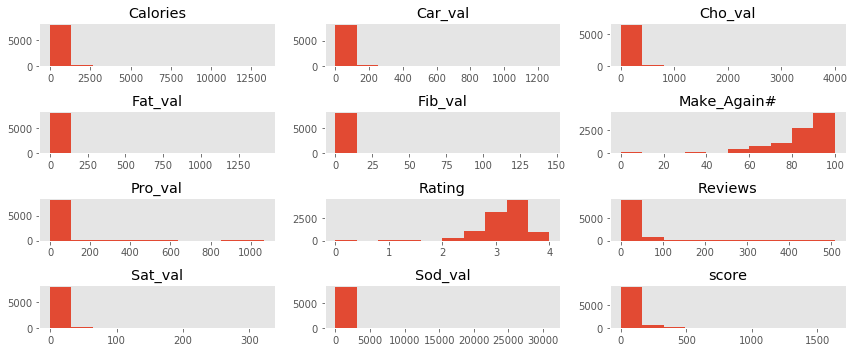

In [341]:
gourmet_nutritions.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

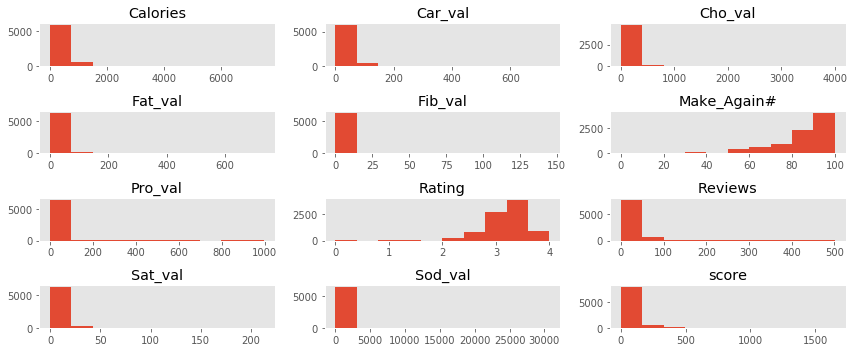

In [342]:
easy_nutritions.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

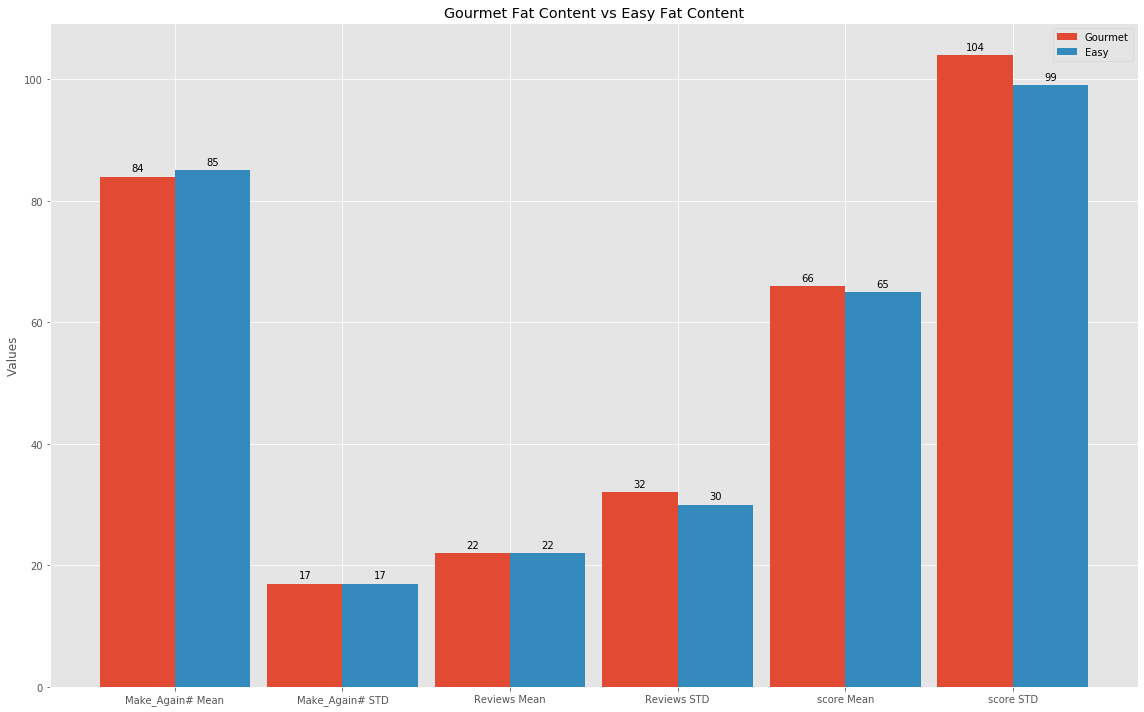

In [345]:
nutrition_list = ['Make_Again#', 'Reviews', 'score']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(gourmet_nutritions[i].mean()))
        summer_means.append(round(gourmet_nutritions[i].std()))
        winter_means.append(round(easy_nutritions[i].mean()))
        winter_means.append(round(easy_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(16,10))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Gourmet')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Easy')

    ax.set_ylabel('Values')
    ax.set_title('Gourmet Fat Content vs Easy Fat Content')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

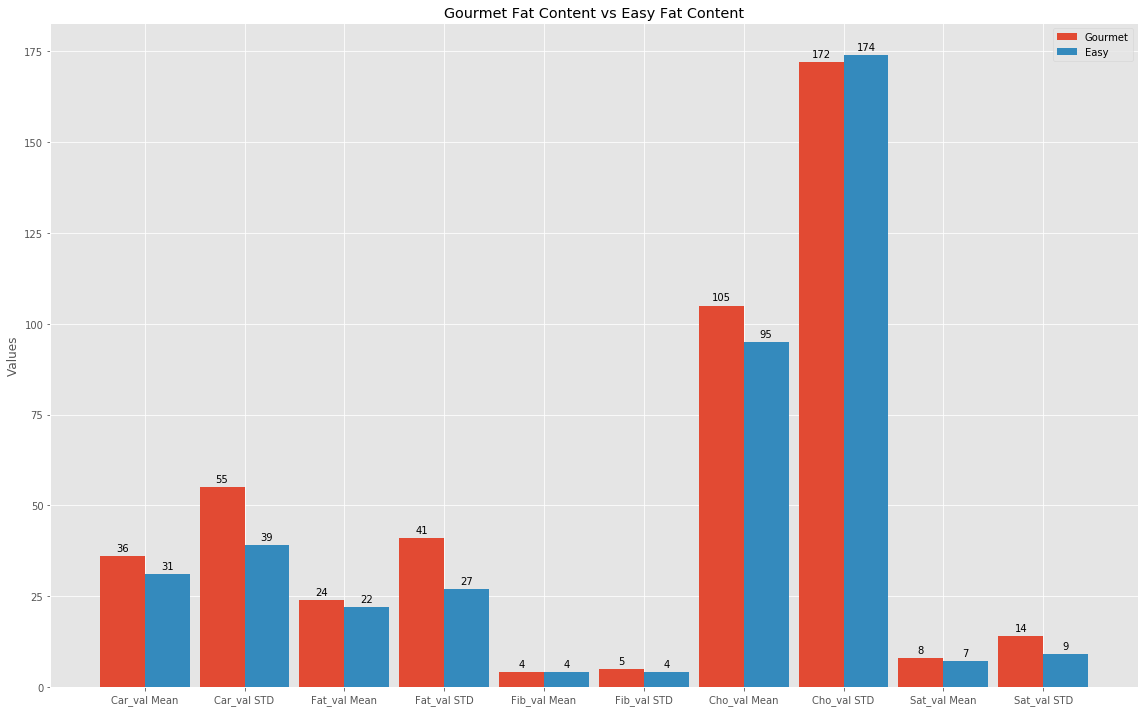

In [347]:
nutrition_list = ['Car_val', 'Fat_val', 'Fib_val', 'Cho_val', 'Sat_val']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(gourmet_nutritions[i].mean()))
        summer_means.append(round(gourmet_nutritions[i].std()))
        winter_means.append(round(easy_nutritions[i].mean()))
        winter_means.append(round(easy_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(16,10))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Gourmet')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Easy')

    ax.set_ylabel('Values')
    ax.set_title('Gourmet Fat Content vs Easy Fat Content')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)